# <font color="dark">Image basics with opencv</font>

## <font color="blue">Introduction</font>

在上一個單元我們已經知道如何使用 numpy 及 matplotlib 來開啟我們的圖片，以及如何將 RGB 三層的圖片分開來操作，

但那些程式碼的處理太多了，opencv 可以幫助我們快速的來處理這些影像 !

## <font color="blue">Open images file in notebook</font>

### Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

### Open image

使用 cv2 的 imread() 可以馬上將圖片存近來，並轉換為 numpy array 的模式

In [2]:
img = cv2.imread('img/dog.jpg')
type(img)

numpy.ndarray

但是這有一個很大的風險，就是說如果我們的圖片路徑打錯，她並不會出現錯誤代碼，所以這時我們最好用 type() 去 double check 一下

In [3]:
img2_wrong = cv2.imread('wrong_path/wrong.png')

In [4]:
type(img2_wrong)

NoneType

然而，在我們用 plt.imshow() 呈現圖片的時候，會感覺有點怪怪的，這是為什麼呢?

原因是 matplotlib 所預設的三原色的圖層依序為 RGB : Red, Green, Blue

但是 opencv 就偏偏不同調，它的圖層順序會改為 BGR : Blue, Green, Red

紅藍的比例跑掉了，當然圖片的呈現會怪怪的~

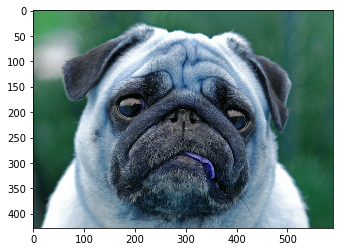

In [5]:
plt.imshow(img)

還好 opencv 有內建的功能來幫助我們來修改這個錯誤，我們可以使用 cvtColor

In [6]:
# cvtColor 可以進行色彩的轉換，第一個參數為我們的 image ， 第二個參數則為轉換的方式 cv2.COLOR_BGR2RGB(COLOR BGR to RGB)

fixed_img = cv2.cvtColor( img , cv2.COLOR_BGR2RGB)

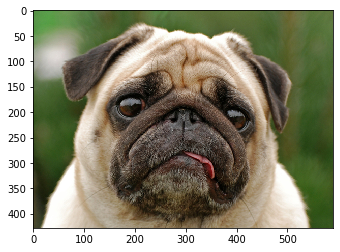

In [7]:
plt.imshow(fixed_img)

當然，有時候我們不想直接拿有色彩的圖片，因為她的 layer 多難處理，所以我們會想直接都轉成黑白的圖片

這樣我們直接在 imread 後面加 IMREAD_GRAYSCALE 即可

In [8]:
img_gray = cv2.imread("img/dog.jpg", cv2.IMREAD_GRAYSCALE)

In [9]:
img_gray.shape

(428, 590)

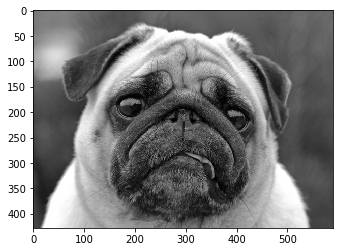

In [10]:
plt.imshow(img_gray,cmap='gray')

### Resizing image

當我們想要修改圖片的大小時，我們可以使用 resize 的方式來修改

我們先來看看我們現在圖片的大小

In [11]:
fixed_img.shape

(428, 590, 3)

我們先來基本的以像素來修改圖片的大小

In [12]:
img_resize = cv2.resize(fixed_img, (256,256))

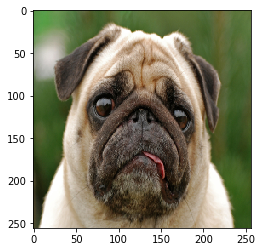

In [13]:
plt.imshow(img_resize,cmap='gray')

In [14]:
img_resize.shape

(256, 256, 3)

當然，像素實在很難去拿捏，所以使用比例來修改圖片的大小也是很常見的方式

In [15]:
# 先定義你要修改的圖片的大小，這邊是等比縮小 50 %
w_ratio = 0.5
h_ratio = 0.5 

# 修改方式大致和修改像素類似，只是像素的地方記得使用(0,0) ，除非你想改變原比例，後面記得再打一次 image 再加上比例，不然會出現 error
img_resize = cv2.resize( fixed_img, (0,0), fixed_img, w_ratio , h_ratio)

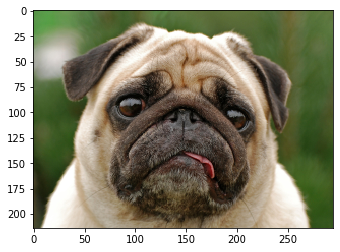

In [16]:
plt.imshow(img_resize, cmap='gray')

In [17]:
img_resize.shape

(214, 295, 3)

### Flip image

圖片有時候我們會想要上像翻轉，或者是左右翻轉，這時候就使用 flip 來改變我們的圖片方向

在 Deep learning 的時候，我們會很常使用這方式來產生圖片增加我們的 data

In [18]:
flip_img = cv2.flip( fixed_img , 0)

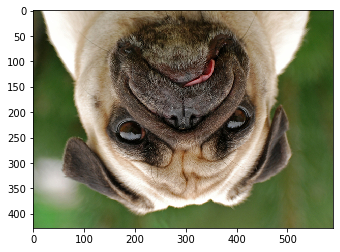

In [19]:
plt.imshow(flip_img)

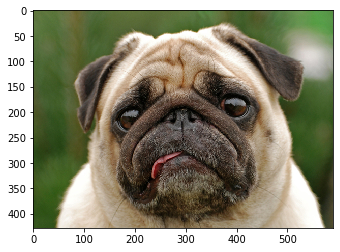

In [20]:
flip_img = cv2.flip( fixed_img , 1)
plt.imshow(flip_img)

### Save the image

我們可以使用 imwrite 來儲存我們的 image，但要注意，它存的圖層格式為 opencv 的圖層順序，所以呈現圖案顏色會有點怪怪的

In [21]:
cv2.imwrite("img/New_picture.jpg",flip_img)

True

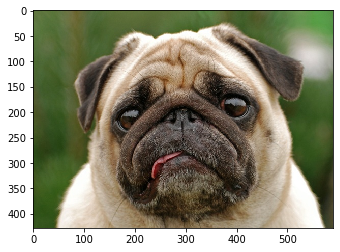

In [22]:

plt.imshow( cv2.imread("img/New_picture.jpg"))

### Change the image size in jupyter notebook

像我們上面看到的，不管像素怎麼改變，image 的圖片大小在 notebook 不會有太多的改變，那要怎麼改變呢?

我們可以調整 matplotlib 的參數來改變 figure 的 size

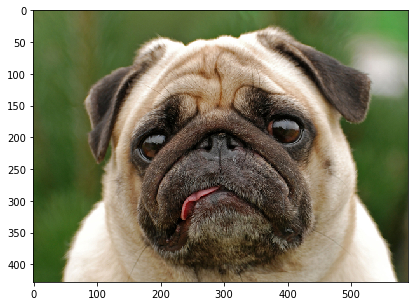

In [23]:
# figsize 的單位是 inches

plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.imshow(flip_img)

## <font color="blue">Drawing on Image with OpenCV</font>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

我們先來做畫布吧~

In [25]:
blank = np.zeros( (512,512,3) )
blank.shape

(512, 512, 3)

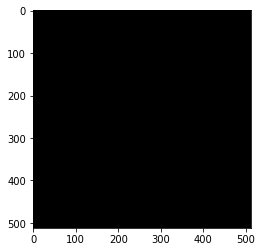

In [26]:
plt.imshow(blank)

#### Draw Rectangle

cv2.rectangle( 你像畫的圖, 正方形左上點， 正方形右下點, color=(RGB顏色代碼), 邊界厚度)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


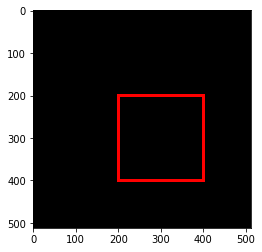

In [27]:
cv2.rectangle( blank, pt1=(200,200), pt2=(400,400), color=(255,0,0), thickness=5)
plt.imshow(blank)

#### Draw Circle

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


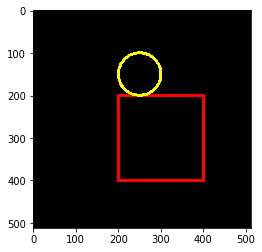

In [28]:
cv2.circle( blank, center=(250,150), radius=50, color=(255,255,0), thickness=5)
plt.imshow(blank)

如果我們想要填滿的話，只要將邊界設成 -1 即可

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


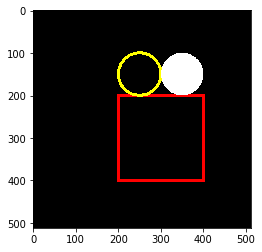

In [29]:
cv2.circle( blank, center=(350,150), radius=50, color=(255,255,255), thickness=-1)
plt.imshow(blank)

#### Draw Line

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


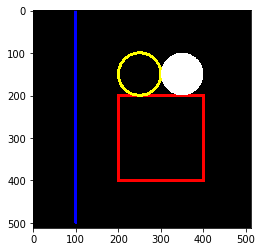

In [30]:
cv2.line( blank, pt1=(100,0), pt2=(100,500), color=(0,0,255), thickness=5)
plt.imshow(blank)

#### Write Word on Image

org : 文字位置 ； fontFace : 字型 ； fontScale : 字體大小

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


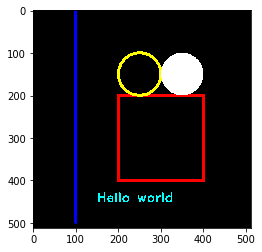

In [31]:
# 設定字型
font = cv2.FONT_HERSHEY_DUPLEX
cv2.putText( blank, text="Hello world", org=(150,450), fontFace=font, fontScale=1, 
            color=(0,255,255), thickness=2, lineType=cv2.LINE_AA )
plt.imshow(blank)

#### Draw Polygon(多邊形)

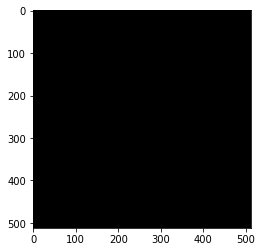

In [32]:
# 開新畫布

blank = np.zeros( (512,512,3) )
plt.imshow(blank)

In [33]:
# definite vertices

vertices = np.array( [[100,150], [50,400], [350,230], [400,350]], dtype=int)
vertices.shape

(4, 2)

In [34]:
# transform to the 3d shape

pts = vertices.reshape(4,1,2)
pts.shape

(4, 1, 2)

In [35]:
# these are 

pts

array([[[100, 150]],

       [[ 50, 400]],

       [[350, 230]],

       [[400, 350]]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


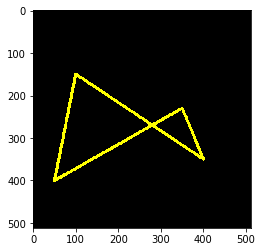

In [36]:
cv2.polylines( blank, [pts], isClosed=True, color=(255,255,0), thickness=5)
plt.imshow(blank)

## <font color="blue">Drawing on Image with your mouse</font>

#### Practice 1 : Draw the circle on Image

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


#==============================
#           Function
#==============================

# 建立 call back 函式。 event: 是我們的滑鼠事件 ； flags: 查看我們的拖曳事件 ； param 是自行定義的事件 ID
def draw_the_circle( event, x, y, flags, param):
    # 定義事件
    if event == cv2.EVENT_LBUTTONDOWN:
        # 畫圓
        cv2.circle( blank, (x,y), radius=20, color=(255,0,0), thickness=-1)

# 建立 call back 函式 和 Image 間的聯繫關係
cv2.namedWindow("Image")

# 建立我們的 callback 方式，並將它指定到我們的 callback 函式
# setMouseCallback : 當我們使用滑鼠做任何動作，它就會回傳你滑鼠的座標回來
cv2.setMouseCallback("Image", draw_the_circle)


#==============================
#         Show the Image
#==============================

blank = np.zeros( (256,256,3) )

while True:
    cv2.imshow("Image",blank)
    
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()

這邊有一點需要注意，setMouseCallback 所呼應的 callback function 具有四個參數 :
<ul>
    <li><font color="red">event</font> : 它會回傳我們的滑鼠事件，可能是按右鍵，按左鍵，右鍵雙擊，左鍵單擊 之類的</li>
    <li><font color="red">x, y </font> : 它會回傳我們的滑鼠事件的座標，x y 座標回傳</li>
    <li><font color="red">flags</font> : 它會回傳我們的滑鼠是否再進行拖曳事件</li>
    <li><font color="red">param</font> : param則是自己定義onMouse()事件的ID，在 GUI 設計時會用到</li>
</ul>

<font color="dark">這邊在簡短介紹一些常見的 event :</font>
<ul>
    <li>EVENT_MOUSEMOVE            滑動</li>
    <li>EVENT_LBUTTONDOWN          左鍵點擊</li>
    <li>EVENT_RBUTTONDOWN          右鍵點擊</li>
    <li>EVENT_MBUTTONDOWN          中鍵點擊</li>
    <li>EVENT_LBUTTONUP            左鍵放開</li>
    <li>EVENT_RBUTTONUP            右鍵放開</li>
    <li>EVENT_MBUTTONUP            中鍵放開</li>
    <li>EVENT_LBUTTONDBLCLK        左鍵雙擊</li>
    <li>EVENT_RBUTTONDBLCLK        右鍵雙擊</li>
    <li>EVENT_MBUTTONDBLCLK        中鍵雙擊</li>
</ul>

<font color="dark">這邊在簡短介紹一些常見的 flag :</font>
<ul>
    <li>EVENT_FLAG_LBUTTON   左鍵拖曳</li>
    <li>EVENT_FLAG_RBUTTON   右鍵拖曳</li>
    <li>EVENT_FLAG_MBUTTON   中鍵拖曳</li>
    <li>EVENT_FLAG_CTRLKEY   按Ctrl不放事件</li>
    <li>EVENT_FLAG_SHIFTKEY  按Shift不放事件</li>
    <li>EVENT_FLAG_ALTKEY    按Alt不放事件</li>
</ul>



#### Practice 2 : Draw the rectangle

In [38]:
import numpy as np
import cv2

#==============================
#           Variable
#==============================

# drawing 這變數是設計用來確認我們滑鼠是否有保持在按下的狀態 or not
drawing = False

# ix,iy 是用來紀錄我們之前的座標用的
ix,iy = 1,1


#==============================
#           Function
#==============================

def draw_rectangle(events,x,y,flags,param):
    
    global drawing,ix,iy
    
    if events == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
        
    elif events == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.rectangle( blank, (ix,iy), (x,y), color=(255,0,0), thickness=-1)
    
    elif events == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.rectangle( blank, (ix,iy), (x,y), color=(255,0,0), thickness=-1)

#==============================
#         Show the Image
#==============================

# build the connection

cv2.namedWindow("Image")
cv2.setMouseCallback("Image",draw_rectangle)


# build the image

blank = np.zeros( (256,256,3) )

while True:
    cv2.imshow("Image",blank)
    
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()

#### Practice 3 : Choose the range of Image

In [39]:
import numpy as np
import cv2

#==================
#     Variables
#==================
drawing = False
points = []

#==================
#     Function
#==================
def Choose_the_range(events,x,y,flags,param):
    global drawing,points
    
    if events == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        points = [(x,y)]
    
    elif events == cv2.EVENT_LBUTTONUP:
        if drawing == True:
            points.append((x,y))
            cv2.rectangle( blank, points[0], points[1], color=(255,0,0), thickness=1)
            drawing = False

#==================
#      Image
#==================

# Set up the Mouse call back function

cv2.namedWindow("Image")
cv2.setMouseCallback("Image",Choose_the_range)

# The image source( Here use the numpy.zero to make array for example)
blank = np.zeros( (512,512,3) )
blank_restart = blank.copy()

while True:
    # Show the Image, and wait for the key
    cv2.imshow("Image",blank)
    key = cv2.waitKey(20) & 0xFF
    
    
    # when you input "Esc", Exit
    if(  key == 27 ):
        break
    
    # when you input "r", restart to choose the range
    elif( key == ord('r') ):
        blank = blank_restart.copy()
        
if len(points)==2:
    Image_cut = blank_restart[ points[0][1]:points[1][1] , points[1][0]:points[1][1] ]
    cv2.imshow( 'ImageCut',Image_cut)
    cv2.waitKey(0)
           
cv2.destroyAllWindows()